In [45]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"online_retail_II.csv")

In [46]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,is_free_item,is_ghost_item,is_return,is_cancel,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,False,False,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,False,False,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,False,False,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,False,False,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,False,False,30.0


In [47]:

print(df.info())


df.describe()


df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   invoice        1067371 non-null  object 
 1   stockcode      1067371 non-null  object 
 2   description    1067371 non-null  object 
 3   quantity       1067371 non-null  int64  
 4   invoicedate    1067371 non-null  object 
 5   price          1067371 non-null  float64
 6   customer_id    1067371 non-null  object 
 7   country        1067371 non-null  object 
 8   is_free_item   1067371 non-null  bool   
 9   is_ghost_item  1067371 non-null  bool   
 10  is_return      1067371 non-null  bool   
 11  is_cancel      1067371 non-null  bool   
 12  total_price    1067371 non-null  float64
dtypes: bool(4), float64(2), int64(1), object(6)
memory usage: 77.4+ MB
None


invoice          53628
stockcode         5305
description       5632
quantity          1057
invoicedate      47635
price             2807
customer_id       5943
country             43
is_free_item         2
is_ghost_item        1
is_return            2
is_cancel            2
total_price       8806
dtype: int64

In [48]:
# Count duplicates 
df.duplicated().sum()

34335

In [49]:
df = df.drop_duplicates()

In [50]:
df.duplicated().sum()

0

In [51]:
df.shape

(1033036, 13)

In [52]:
df.isnull().sum()

invoice          0
stockcode        0
description      0
quantity         0
invoicedate      0
price            0
customer_id      0
country          0
is_free_item     0
is_ghost_item    0
is_return        0
is_cancel        0
total_price      0
dtype: int64

TOTAL PRICE

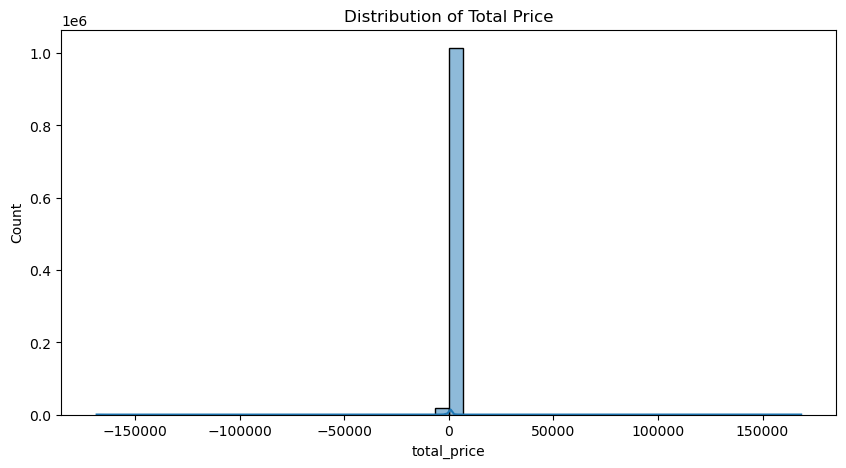

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_price'], bins=50, kde=True)
plt.title('Distribution of Total Price')
plt.show()

C:\Users\manya\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\manya\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_total_price', ylabel='Count'>

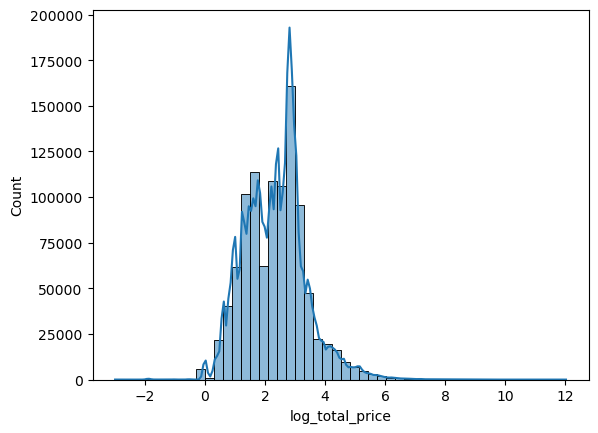

In [54]:
df_sales = df.copy()   
df_sales['log_total_price'] = np.log1p(df_sales['total_price'])

sns.histplot(df_sales['log_total_price'], bins=50, kde=True)


In [55]:
import pandas as pd
import numpy as np

bins = [-np.inf, 0, 10, 50, 200, 500, np.inf]
labels = [
    'Returns (< £0)',
    '£0 to < £10',
    '£10 to < £50',
    '£50 to < £200',
    '£200 to < £500',
    '£500+'
]

#Categorize the total_price column
df['price_bin'] = pd.cut(
    df['total_price'],
    bins=bins,
    labels=labels,
    right=False,  
    include_lowest=True
)


bin_counts = df['price_bin'].value_counts()

 #Reindex to ensure the logical order of bins for clear viewing
bin_counts = bin_counts.reindex(labels)

#Convert to DataFrame for a clean output
bin_summary_df = pd.DataFrame(bin_counts)
bin_summary_df.columns = ['Transaction Count']

print("Transaction Counts by Total Price Bin ")
print(bin_summary_df)

Transaction Counts by Total Price Bin 
                Transaction Count
Returns (< £0)              19108
£0 to < £10                504726
£10 to < £50               446520
£50 to < £200               53193
£200 to < £500               7218
£500+                        2271


In [56]:
df['total_price'].mode()[0]

15.0

This section analyzes how different countries contribute to revenue leakage through returns, cancellations, and other loss types. The metrics used include:

Revenue: Total positive sales value

Leakage: Total loss from returns, cancellations, and other leak sources

Leakage %: Leakage as a percentage of revenue

In [61]:
df['leak_amount'] = 0

df.loc[df['is_return'], 'leak_amount'] = df.loc[df['is_return'], 'total_price'].abs()
df.loc[df['is_cancel'], 'leak_amount'] = df.loc[df['is_cancel'], 'total_price'].abs()
df.loc[df['is_free_item'], 'leak_amount'] = df.loc[df['is_free_item'], 'total_price'].abs()


In [62]:
country_leakage = df.groupby('country')['leak_amount'].sum()
country_summary = pd.DataFrame({
    "revenue": sales_df.groupby("country")["total_price"].sum(),
    "leakage": df.groupby("country")["leak_amount"].sum()
})

country_summary["leakage_pct"] = (
    country_summary["leakage"] / country_summary["revenue"] * 100
)

country_summary.sort_values("leakage_pct", ascending=False).head(10)



,revenue,leakage,leakage_pct
country,,,
Nigeria,140.39,147.05,104.743928
Singapore,25317.06,12158.90,48.026509
Hong Kong,23685.52,9855.02,41.607784
Norway,56322.50,20866.59,37.048409
Malta,8099.09,2906.87,35.891316
RSA,4804.32,1435.29,29.874988
USA,8366.86,2080.32,24.863808
Spain,108332.49,17319.05,15.986940
Korea,1118.51,168.69,15.081671


Countries with high leakage % lose a large portion of their revenue due to returns, cancellations, or pricing issues. These markets should be prioritized for root-cause analysis and operational fixes.

In [63]:
df[df['country']=="Nigeria"][['is_return','is_cancel','is_free_item','total_price']].head(20)


,is_return,is_cancel,is_free_item,total_price
6376,True,True,False,-79.05
6377,True,True,False,-68.00
71075,False,False,False,27.82
312636,False,False,False,2.55
312637,False,False,False,9.95
312638,False,False,False,1.45
312639,False,False,False,3.75
312640,False,False,False,1.25
312641,False,False,False,1.25
312642,False,False,False,1.25


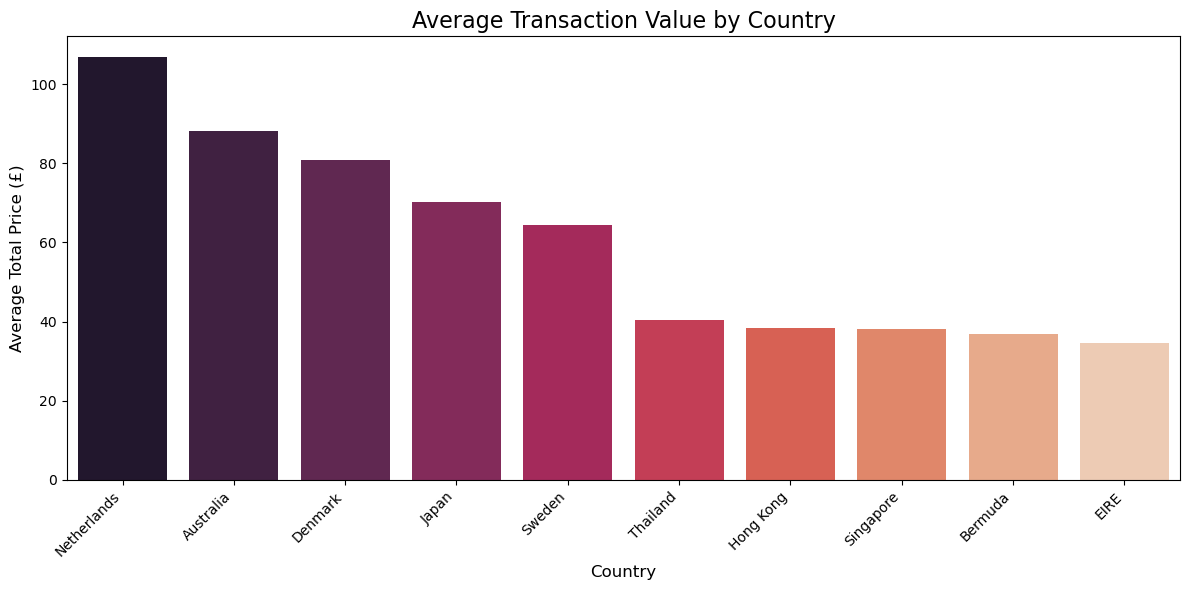

In [59]:

# Calculate Average Transaction Value by Country
country_avg_price = df.groupby('country')['total_price'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg_price.index, y=country_avg_price.values, palette="rocket")
plt.title('Average Transaction Value by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Total Price (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Netherlands and Australia customers are highest-value buyers per transaction

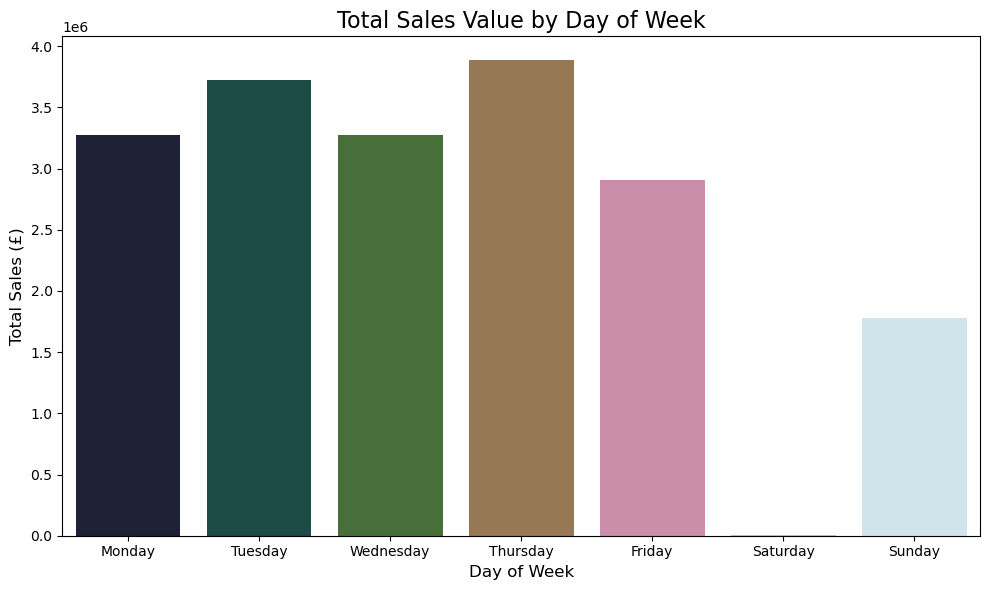

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract Day of Week
df['InvoiceDayOfWeek'] = df['invoicedate'].dt.day_name()

#Define the correct order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate and visualize the total sales sum by Day of Week
day_sales = df.groupby('InvoiceDayOfWeek')['total_price'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="cubehelix")
plt.title('Total Sales Value by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Since it is a wholesale dataset the sales on weekends are low

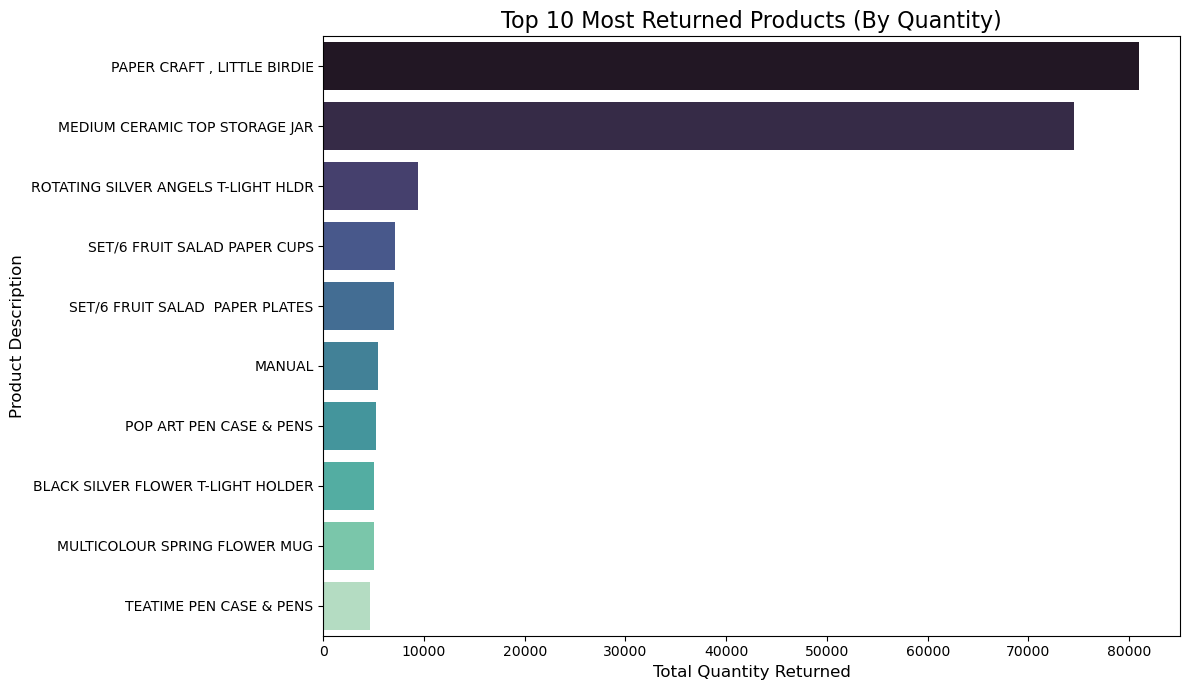

In [65]:
# Filter the DataFrame to include only returns (is_return must be True or total_price < 0)
df_returns = df[df['total_price'] < 0].copy()
df_returns['Absolute_Quantity'] = df_returns['quantity'].abs()

# Group by product description and sum the absolute quantity returned
returns_by_product = df_returns.groupby('description')['Absolute_Quantity'].sum()
top_10_returns = returns_by_product.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_returns.values, y=top_10_returns.index, palette="mako")
plt.title('Top 10 Most Returned Products (By Quantity)', fontsize=16)
plt.xlabel('Total Quantity Returned', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.tight_layout()
plt.show()

The UK fulfillment chain (packaging, shipping, QC) is the source of the greatest revenue loss from returns.

In [66]:
top_products_qty = (df.groupby("description")["quantity"]
                      .sum()
                      .sort_values(ascending=False)
                      .head(20))
top_products_qty


description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      104546
WHITE HANGING HEART T-LIGHT HOLDER      91026
ASSORTED COLOUR BIRD ORNAMENT           79579
JUMBO BAG RED RETROSPOT                 76514
BROCADE RING PURSE                      69639
PACK OF 60 PINK PAISLEY CAKE CASES      55842
60 TEATIME FAIRY CAKE CASES             53678
PACK OF 72 RETROSPOT CAKE CASES         47695
PACK OF 72 RETRO SPOT CAKE CASES        46079
ASSORTED COLOURS SILK FAN               42463
MINI PAINT SET VINTAGE                  42005
PACK OF 72 SKULL CAKE CASES             40174
COLOUR GLASS T-LIGHT HOLDER HANGING     39710
PACK OF 12 LONDON TISSUES               39279
VICTORIAN GLASS HANGING T-LIGHT         39073
SMALL POPCORN HOLDER                    38472
POPCORN HOLDER                          36322
GIRLS ALPHABET IRON ON PATCHES          36201
STRAWBERRY CERAMIC TRINKET BOX          35847
JUMBO BAG STRAWBERRY                    35790
Name: quantity, dtype: int64

In [67]:
top_products_rev = (df.groupby("description")["total_price"]
                      .sum()
                      .sort_values(ascending=False)
                      .head(20))
top_products_rev


description
REGENCY CAKESTAND 3 TIER               314045.02
DOTCOM POSTAGE                         309844.10
WHITE HANGING HEART T-LIGHT HOLDER     251603.12
PARTY BUNTING                          147079.73
JUMBO BAG RED RETROSPOT                145946.05
ASSORTED COLOUR BIRD ORNAMENT          128550.42
PAPER CHAIN KIT 50'S CHRISTMAS         116298.59
POSTAGE                                110430.41
CHILLI LIGHTS                           79905.13
ROTATING SILVER ANGELS T-LIGHT HLDR     70969.95
JUMBO BAG STRAWBERRY                    68489.89
RABBIT NIGHT LIGHT                      66661.63
BLACK RECORD COVER FRAME                65107.00
JUMBO STORAGE BAG SUKI                  60826.92
VINTAGE UNION JACK BUNTING              59742.04
EDWARDIAN PARASOL NATURAL               59305.30
JUMBO  BAG BAROQUE BLACK WHITE          58571.90
HOT WATER BOTTLE TEA AND SYMPATHY       58393.94
PAPER CHAIN KIT VINTAGE CHRISTMAS       57467.10
CHOCOLATE HOT WATER BOTTLE              57294.46
Name: to

In [68]:
customer_revenue = (df.groupby("customer_id")["total_price"]
                      .sum()
                      .sort_values(ascending=False)
                      .head(20))
customer_revenue


customer_id
Unknown    2565542.41
18102       570380.61
14646       523342.07
14156       296063.44
14911       265757.91
17450       231390.55
13694       190020.84
17511       168491.62
12415       143269.29
16684       141502.25
15061       124961.98
15311       111739.36
13089       109893.24
17949        97581.59
14298        90489.31
16029        89705.47
15769        84177.58
13798        73166.92
15838        72727.41
12931        71299.67
Name: total_price, dtype: float64

In [69]:
customer_freq = df.groupby("customer_id")["invoice"].nunique()\
                   .sort_values(ascending=False)\
                   .head(20)
customer_freq
    

customer_id
Unknown    8752
14911       510
12748       365
17841       289
15311       270
14606       259
13089       247
14156       202
14527       190
13694       164
14646       164
17850       159
18102       153
16422       146
15061       138
17949       138
13408       135
12471       129
16029       125
13798       125
Name: invoice, dtype: int64

In [70]:
country_revenue = df.groupby("country")["total_price"].sum().sort_values(ascending=False)
country_revenue.head(20)


country
United Kingdom     1.598606e+07
EIRE               6.099538e+05
Netherlands        5.483307e+05
Germany            4.119592e+05
France             3.217334e+05
Australia          1.664444e+05
Switzerland        9.940306e+04
Spain              9.101344e+04
Sweden             8.777552e+04
Denmark            6.445959e+04
Belgium            6.320889e+04
Portugal           5.140368e+04
Channel Islands    4.108018e+04
Japan              3.966210e+04
Norway             3.545591e+04
Italy              3.025410e+04
Finland            2.951445e+04
Cyprus             2.403256e+04
Austria            2.317760e+04
Greece             1.899549e+04
Name: total_price, dtype: float64

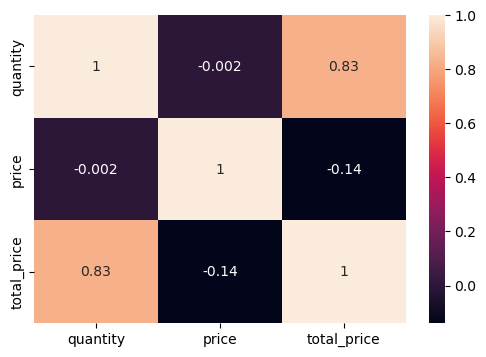

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["quantity","price","total_price"]].corr(), annot=True)
plt.show()


In [40]:
risky_products = df.groupby('description').agg({
    'quantity': lambda x: (x < 0).sum(),
    'price':    lambda x: (x == 0).sum(),
    'invoice':  'count',
    'total_price': 'sum'
})
risky_products.sort_values(by=['quantity', 'price'], ascending=False).head(20)


,quantity,price,invoice,total_price
description,,,,
MANUAL,533,0,1385,-83311.28
REGENCY CAKESTAND 3 TIER,341,0,4291,314045.02
POSTAGE,228,0,2079,110430.41
BAKING SET 9 PIECE RETROSPOT,209,0,2135,41829.06
STRAWBERRY CERAMIC TRINKET BOX,181,0,2533,46246.76
DISCOUNT,168,0,173,-12879.63
WHITE HANGING HEART T-LIGHT HOLDER,134,0,5735,251603.12
WHITE CHERRY LIGHTS,126,0,476,11627.62
RED RETROSPOT CAKE STAND,107,0,1296,44290.39


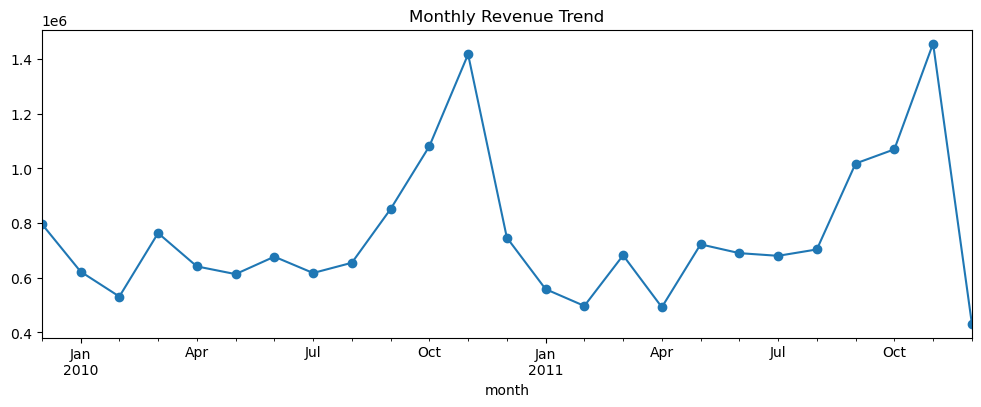

In [41]:
df['month'] = df['invoicedate'].dt.to_period('M')
monthly_sales = df.groupby('month')['total_price'].sum()

monthly_sales.plot(kind='line', figsize=(12,4), marker='o')
plt.title("Monthly Revenue Trend")
plt.show()


In [72]:
free_items = df[df['price'] == 0]

free_items_stats = {
    "free_item_rows": len(free_items),
    "total_free_quantity": free_items['quantity'].sum(),
    "distinct_products": free_items['stockcode'].nunique(),
    "distinct_customers": free_items['customer_id'].nunique(),
}
free_items_stats


{'free_item_rows': 6014,
 'total_free_quantity': -318555,
 'distinct_products': 2971,
 'distinct_customers': 52}

With 2971 leaking products, leakage is not limited to a single SKU—it’s spread across most of the catalog.

High number of free-item rows indicates a systematic issue, not random errors.

A very small group of customers (52) is receiving an unusually large amount of free stock (318K units), suggesting either:

Special discount agreements,

Bulk sampling,

Or potential misuse.

In [75]:
df.to_csv(r"Desktop\online_retail_II.csv", index=False)
print("Saved cleaned file!")

Saved cleaned file!
